In [46]:
import pandas as pd 
import numpy as np 
import cv2
import tensorflow as tf
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2




In [47]:
import os

# Path to dataset (update this if needed)
train_dir = "/Users/varunshrivathsa/Work/MachineLearning/Neural_Networks/CNN/Facial Emotion Detection/face_data/train"
test_dir = "/Users/varunshrivathsa/Work/MachineLearning/Neural_Networks/CNN/Facial Emotion Detection/face_data/test"

# Function to count images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get counts
train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

# Print results
print("📌 Train Data Distribution:", train_counts)
print("📌 Test Data Distribution:", test_counts)


📌 Train Data Distribution: {'happy': 7215, 'sad': 4830, 'fear': 4097, 'surprise': 3171, 'neutral': 4965, 'angry': 3995, 'disgust': 436}
📌 Test Data Distribution: {'happy': 1774, 'sad': 1247, 'fear': 1024, 'surprise': 831, 'neutral': 1233, 'angry': 958, 'disgust': 111}


In [48]:
image = cv2.imread('/Users/varunshrivathsa/Work/MachineLearning/Neural_Networks/CNN/Facial Emotion Detection/face_data/train/angry/Training_3908.jpg')

In [49]:
image.shape

(48, 48, 3)

In [50]:
# Define directories
train_dir = "/Users/varunshrivathsa/Work/MachineLearning/Neural_Networks/CNN/Facial Emotion Detection/face_data/train"  # Training data path
test_dir = "/Users/varunshrivathsa/Work/MachineLearning/Neural_Networks/CNN/Facial Emotion Detection/face_data/test"    # Test data path

# ✅ Data Augmentation for Training Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Augment only the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    zoom_range = 0.3,
    horizontal_flip = True        # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for test

# ✅ Load the data with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    shuffle = True,
    class_mode='categorical',
    color_mode = 'grayscale',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    shuffle = True,
    class_mode='categorical',
    color_mode = 'grayscale',
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [51]:
# # ✅ Load Training Data
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='categorical'  # Multi-class classification
# )

# # ✅ Load Testing Data
# # test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='categorical'
# )


In [52]:
# ✅ Build CNN Model
model = Sequential([
    Conv2D(32, (5,5), activation='relu', padding='same',input_shape=(48, 48, 1)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes: Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise
])

# ✅ Show Model Summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     9,437,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,531,911 (36.36 MB)

 Trainable params: 9,531,655 (36.36 MB)

 Non-trainable params: 256 (1.00 KB)

In [53]:
# optimizer = Adam(learning_rate=5e-6)  # Reduce to 5e-6

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# # ✅ Define Callbacks
# # early_stopping = EarlyStopping(
# #     monitor='val_loss',
# #     patience=10,
# #     restore_best_weights=True
# # )

# # reduce_lr = ReduceLROnPlateau(
# #     monitor='val_loss',
# #     factor=0.5,
# #     patience=5,
# #     verbose=1
# # )

# # ✅ Train the Model

# history = model.fit(
#     train_generator,
#     validation_data=test_generator,
#     epochs=50,  # Use 50 epochs initially
#     # callbacks=[early_stopping],
#     verbose=1
# )
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# ]


history = model.fit(
    x=train_generator,
    validation_data=test_generator,
    epochs=50,  # Use 50 epochs initially
    # callbacks=callbacks,  # Ensure callbacks like EarlyStopping are defined
    verbose=1  # Shows training progress
)



Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 361ms/step - accuracy: 0.3130 - loss: 1.8773 - val_accuracy: 0.3371 - val_loss: 1.6775
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 158s 352ms/step - accuracy: 0.4143 - loss: 1.5028 - val_accuracy: 0.4512 - val_loss: 1.4186
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 158s 351ms/step - accuracy: 0.4468 - loss: 1.4234 - val_accuracy: 0.4543 - val_loss: 1.4813
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 160s 357ms/step - accuracy: 0.4773 - loss: 1.3654 - val_accuracy: 0.4886 - val_loss: 1.3486
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 364ms/step - accuracy: 0.4895 - loss: 1.3321 - val_accuracy: 0.4964 - val_loss: 1.3141
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 160s 356ms/step - accuracy: 0.5021 - loss: 1.2984 - val_accuracy: 0.5095 - val_loss: 1.2924
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 363ms/step - accuracy: 0.5181 - loss: 1.2643 - val_accuracy: 0.4943 - val_loss: 1.3584
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 167s 373ms/step - accuracy: 0.5240 - loss: 1.24

In [ ]:
 # ✅ Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5667 - loss: 1.4112
Test Accuracy: 56.41%


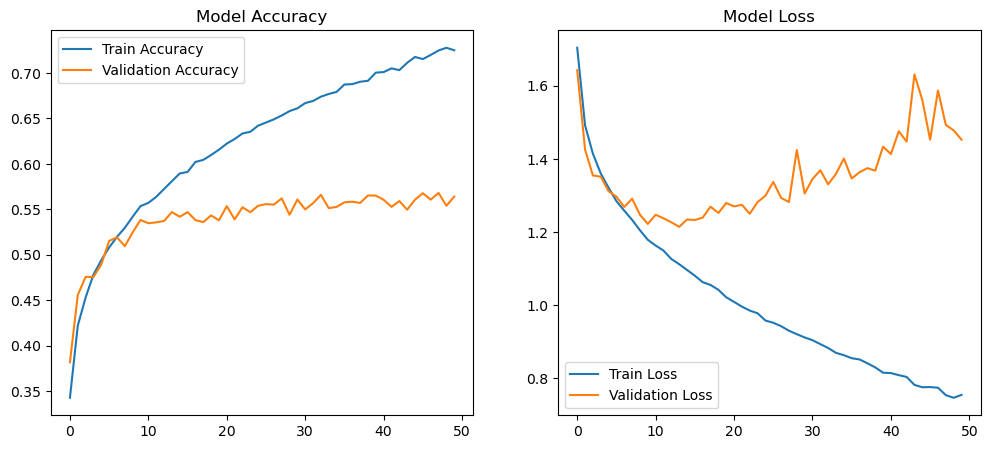

In [ ]:
import matplotlib.pyplot as plt

# ✅ Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


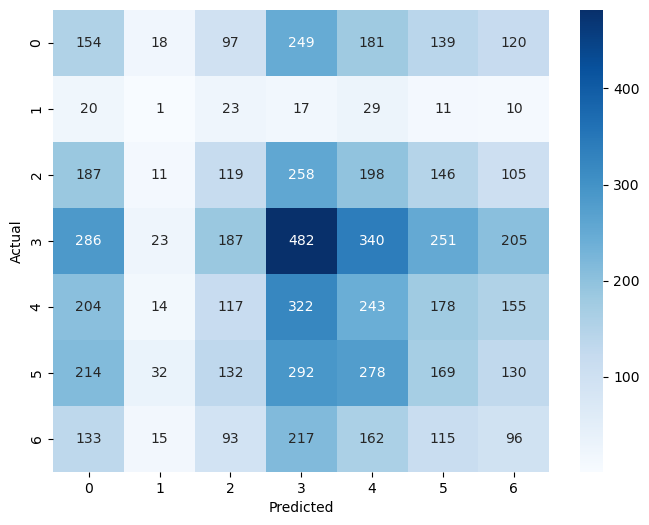

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
